<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Heat%20Transfer/ME421_E20048_HVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cooling Load Calculation for Milk Storage

### 1. System Parameters
* **Number of containers ($n$):** 40
* **Mass of milk per container ($m_m$):** 5 kg
* **Mass of empty container ($m_c$):** 2 kg
* **Specific heat of milk ($c_m$):** $4000\text{ J/kg}\cdot\text{K}$
* **Specific heat of aluminum ($c_c$):** $921.1\text{ J/kg}\cdot\text{K}$
* **Target temperature ($T_f$):** $15^\circ\text{C}$
* **Cooling time ($t$):** 2 hours ($7200\text{ seconds}$)

---

### 2. Case A: Average Initial Temperature ($T_i = 37.5^\circ\text{C}$)
*Calculated for the $35^\circ\text{C} - 40^\circ\text{C}$ range.*

**Total Heat Removal ($Q$):**
$$Q = n \times [(m_m \cdot c_m + m_c \cdot c_c) \times (T_i - T_f)]$$
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (37.5 - 15)]$$
$$Q = 19,657,980\text{ J} \approx 19.66\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{19,657,980}{7200}$$
**$$\dot{Q}_{avg} \approx 2.73\text{ kW}$$**

---

### 3. Case B: Maximum Initial Temperature ($T_i = 40^\circ\text{C}$)
*Calculated for the worst-case scenario.*

**Total Heat Removal ($Q$):**
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (40 - 15)]$$
$$Q = 21,842,200\text{ J} \approx 21.84\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{21,842,200}{7200}$$
**$$\dot{Q}_{max} \approx 3.03\text{ kW}$$**

In [ ]:
# Parameters from the laboratory problem statement
n_containers = 40          # Number of containers [cite: 26]
m_container = 2            # Weight of an empty container in kg [cite: 27]
m_milk = 5                 # Weight of milk per container in kg [cite: 28]
cp_container = 921.1       # Specific heat of aluminum in J/kgK [cite: 29]
cp_milk = 4000.0           # Specific heat of milk in J/kgK [cite: 30]
t_target = 15.0            # Target storage temperature in Celsius [cite: 24]
cooling_time_hours = 2     # Required cooling duration [cite: 24]

# Time conversion to seconds
cooling_time_sec = cooling_time_hours * 3600

def calculate_load(t_initial):
    """
    Calculates the cooling load in kW for a given initial temperature.
    """
    # Total heat to be removed = (Heat from milk + Heat from containers)
    # Q = m * cp * Delta_T
    q_milk = n_containers * (m_milk * cp_milk * (t_initial - t_target))
    q_container = n_containers * (m_container * cp_container * (t_initial - t_target))

    total_q_joules = q_milk + q_container

    # Load (Power) = Energy / Time
    load_watts = total_q_joules / cooling_time_sec
    return load_watts / 1000  # Convert to kW

# Scenarios based on initial milk temperature range (35C - 40C) [cite: 23]
t_avg = (35 + 40) / 2
t_max = 40.0

load_avg = calculate_load(t_avg)
load_max = calculate_load(t_max)

print(f"--- Cooling Load Results ---")
print(f"Initial Temp: 37.5°C (Average) -> Load: {load_avg:.3f} kW")
print(f"Initial Temp: 40.0°C (Maximum) -> Load: {load_max:.3f} kW")

--- Cooling Load Results ---
Initial Temp: 37.5°C (Average) -> Load: 2.730 kW
Initial Temp: 40.0°C (Maximum) -> Load: 3.034 kW


## Experimental Methodology for Unit Evaluation

This procedure outlines the experimental approach to determine the actual cooling capacity ($\dot{Q}_{act}$) of the laboratory unit and assess its feasibility for the milk cooling task.

---

### 1. Measurement Parameters
To analyze the system, the following physical and thermodynamic properties must be measured:

* **Duct Geometry:** Measure the width ($w$) and height ($h$) of the air intake duct to calculate the cross-sectional area ($A = w \times h$).
* **Air Velocity ($v$):** Use an anemometer to measure the air velocity at the intake. Multiple readings should be averaged to account for non-uniform flow.
* **Psychrometric States:** Measure the **Dry Bulb Temperature ($T_{db}$)** and **Wet Bulb Temperature ($T_{wb}$)** at:
    * **State 1 (Inlet):** Ambient air entering the evaporator.
    * **State 2 (Outlet):** Conditioned air exiting the evaporator.

---

### 2. Thermodynamic Calculations
The performance of the unit is governed by the enthalpy change of the air stream.

**Mass Flow Rate of Air ($\dot{m}_a$):**
$$\dot{m}_a = \rho \cdot A \cdot v$$
*Where $\rho \approx 1.2 \text{ kg/m}^3$ (density of air at STP).*

**Actual Cooling Capacity ($\dot{Q}_{act}$):**
Using the measured temperatures and a psychrometric chart, determine the specific enthalpy ($h$) for both states.
$$\dot{Q}_{act} = \dot{m}_a \times (h_{in} - h_{out})$$



---

### 3. Data Collection Table

| Parameter | Symbol | Unit | Value |
| :--- | :--- | :--- | :--- |
| Duct Area | $A$ | $m^2$ | |
| Avg. Air Velocity | $v$ | $m/s$ | |
| Inlet Enthalpy | $h_{in}$ | $kJ/kg$ | |
| Outlet Enthalpy | $h_{out}$ | $kJ/kg$ | |
| **Actual Cooling Capacity** | **$\dot{Q}_{act}$** | **kW** | |

---

### 4. Feasibility Criteria
The unit is deemed suitable if its actual capacity meets the maximum required load calculated for the factory conditions:
* **Target Load (Max):** $3.03 \text{ kW}$
* **Decision Rule:**
    * If $\dot{Q}_{act} \geq 3.03 \text{ kW}$: **Suitable.**
    * If $\dot{Q}_{act} < 2.73 \text{ kW}$: **Insufficient; developments required.**

## Experimental Data and Analysis of Fan Speed Performance

This section presents the data obtained at different evaporator fan speeds. The experiment was conducted with the cold room open to maintain a stable inlet condition while varying the air flow rate to determine the setting for maximum heat removal.

### 1. Column Descriptions (Nomenclature)
To interpret the data correctly, the temperature sensors are defined as follows:
* **$D_1$**: internal diameter of return air duct (m)
* **$D_1$**: internal diameter of cool air inlet duct (m)
* **$T_1$**: Return air dry bulb temperature ($^\circ$C)
* **$T_2$**: Return air wet bulb temperature ($^\circ$C)
* **$T_3$**: Evaporator inlet dry bulb temperature ($^\circ$C)
* **$T_4$**: Evaporator inlet wet bulb temperature ($^\circ$C)
* **$T_5$**: Evaporator exit dry bulb temperature ($^\circ$C)
* **$T_6$**: Evaporator exit wet bulb temperature ($^\circ$C)
* **$V_{in}$ / $V_{out}$**: Air velocity at intake and exit (m/s)

---

### 2. Recorded Experimental Data
D_1 = 0.11 m

| Fan Speed | $T_1$ | $T_2$ | $T_3$ | $T_4$ | $T_5$ | $T_6$ | $V_{in}$ | $V_{out}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **1** | 29.5 | 25.2 | 29.1 | 21.2 | 26.4 | 19.9 | 0.0 | 0.0 |
| **2** | 29.5 | 25.3 | 29.1 | 21.1 | 26.7 | 20.0 | 0.0 | 0.0 |
| **3** | 29.9 | 25.3 | 29.5 | 21.5 | 24.3 | 19.7 | 0.6 | 0.5 |
| **4** | 30.0 | 24.9 | 29.6 | 21.8 | 20.4 | 16.6 | 2.8 | 2.6 |
| **5** | 29.2 | 23.7 | 29.3 | 21.2 | 20.8 | 16.2 | 5.6 | 5.4 |
| **6** | 29.2 | 23.3 | 29.3 | 21.1 | 21.4 | 18.0 | 8.8 | 8.1 |
| **7** | 29.4 | 23.2 | 29.3 | 21.1 | 21.5 | 18.2 | 9.3 | 8.4 |
| **8** | 29.0 | 23.1 | 29.1 | 21.0 | 21.2 | 17.6 | 9.6 | 8.5 |
| **9** | 28.7 | 22.9 | 28.9 | 20.9 | 21.3 | 17.4 | 9.8 | 8.7 |
| **10** | 29.4 | 23.2 | 29.3 | 21.1 | 19.9 | 16.5 | 9.5 | 9.1 |

---

### 3. Reasoning and Performance Analysis

The cooling capacity of the unit is determined by analyzing the air as it passes through the evaporator (from State $T_3, T_4$ to State $T_5, T_6$).

* **Evaporator Performance**: The actual heat removal occurs between the **Evaporator Inlet** ($T_3, T_4$) and the **Evaporator Exit** ($T_5, T_6$). The difference in wet bulb temperatures ($T_4 - T_6$) represents the total enthalpy drop (sensible + latent heat) of the air stream.
* **Mass Flow Influence**: As the fan speed increases, the intake velocity ($V_{in}$) rises to a peak of $9.8$ m/s at Speed 9. This significantly increases the air mass flow rate ($\dot{m}_a$), which is a primary driver of the total cooling load ($\dot{Q} = \dot{m}_a \Delta h$).
* **Efficiency at High Speeds**: At fan speed 10, although the velocity ($9.5$ m/s) is slightly lower than at speed 9, we observe the lowest exit dry bulb ($T_5 = 19.9^\circ$C) and exit wet bulb ($T_6 = 16.5^\circ$C). This indicates that speed 10 may provide the most effective cooling by optimizing the contact time between the air and the evaporator coils.
* **Feasibility Conclusion**: By calculating $\dot{Q}$ for these high-speed settings using the enthalpy values from $T_4$ and $T_6$, we can determine if the unit exceeds the required **3.03 kW** maximum load for the factory's milk storage needs.

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1921871544.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature $T_5$ ($^\circ$C)', fontsize=12)


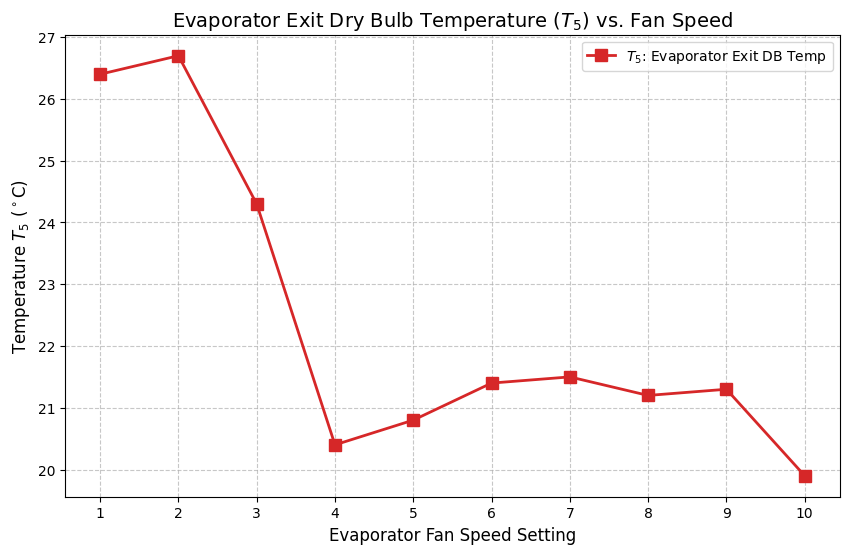

In [1]:
import matplotlib.pyplot as plt

# Experimental Data from Table
fan_speeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
t5_values = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(fan_speeds, t5_values, marker='s', linestyle='-', color='tab:red', linewidth=2, markersize=8)

# Add labels and title using LaTeX formatting
plt.title('Evaporator Exit Dry Bulb Temperature ($T_5$) vs. Fan Speed', fontsize=14)
plt.xlabel('Evaporator Fan Speed Setting', fontsize=12)
plt.ylabel('Temperature $T_5$ ($^\circ$C)', fontsize=12)

# Set x-axis ticks to match fan speed settings exactly
plt.xticks(fan_speeds)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['$T_5$: Evaporator Exit DB Temp'], loc='upper right')

# Display the plot
plt.show()

## 4. Experimental Analysis and Thermodynamic Logic

This section details the mathematical framework used to evaluate the cooling capacity of the laboratory unit based on the experimental data obtained.

---

### 4.1 Mass Flow Rate of Air ($\dot{m}_a$)
The mass flow rate is the foundational parameter for calculating heat transfer. It is derived from the air velocity measured at the intake:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

* **$\rho$**: Density of air ($\approx 1.2 \text{ kg/m}^3$).
* **$A$**: Cross-sectional area of the duct ($m^2$).
* **$V_{in}$**: Measured air intake velocity ($m/s$).

---

### 4.2 Calculation of Specific Enthalpy ($h$)
To determine the total energy (sensible and latent heat) removed from the air, we use the measured Dry Bulb ($T_{db}$) and Wet Bulb ($T_{wb}$) temperatures.

#### **Step A: Saturation Vapor Pressure ($P_{swb}$)**
Using the Magnus-Tetens approximation at the Wet Bulb temperature:
$$P_{swb} = 0.61078 \cdot \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

#### **Step B: Actual Vapor Pressure ($P_v$)**
Applying the psychrometric formula to account for the evaporative cooling effect:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
* **$P_{atm}$**: Atmospheric pressure ($101.325 \text{ kPa}$).

#### **Step C: Humidity Ratio ($\omega$)**
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm}-P_v}$$

#### **Step D: Specific Enthalpy ($h$)**
The total enthalpy in $\text{kJ/kg}$ of dry air is calculated as:
$$h = (c_{p,a} \cdot T_{db}) + \omega \cdot (h_{fg} + c_{p,v} \cdot T_{db})$$

* **$c_{p,a}$**: $1.006 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of dry air).
* **$h_{fg}$**: $2501 \text{ kJ/kg}$ (Latent heat of vaporization).
* **$c_{p,v}$**: $1.86 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of water vapor).



---

### 4.3 Determination of Heat Removal Rate ($\dot{Q}$)
The experimental cooling capacity is defined by the enthalpy difference between the **Return Air** (Inlet) and the **Evaporator Exit** (Outlet)[cite: 13, 16]:

$$\dot{Q} = \dot{m}_a \cdot (h_{in} - h_{out})$$

* **$h_{in}$**: Calculated using $T_1$ (Return DB) and $T_2$ (Return WB).
* **$h_{out}$**: Calculated using $T_5$ (Exit DB) and $T_6$ (Exit WB).

---




<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-155558524.py:52: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Total Heat Removed ($\dot{Q}$) vs. Fan Speed (Inlet: $T_1, T_2$)', fontsize=14)


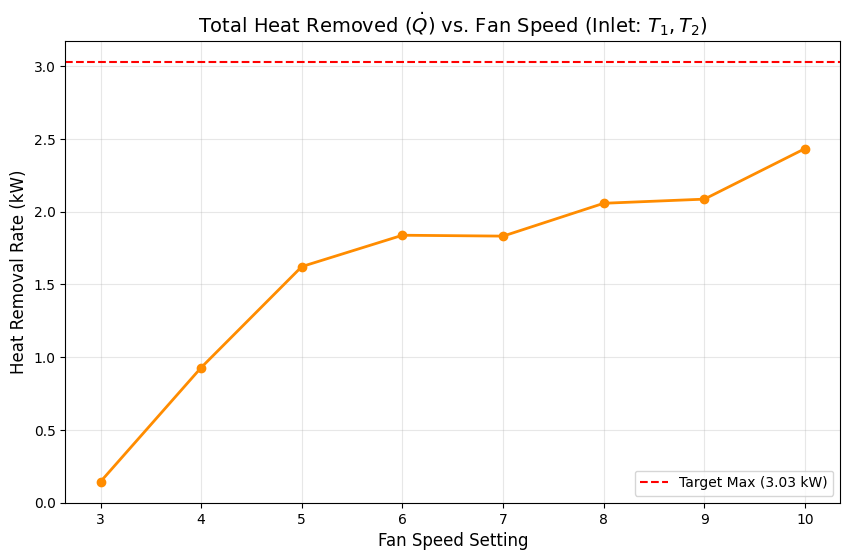

   fan_speed  V_in  Q_dot_kW
0          3   0.6  0.144262
1          4   2.8  0.928436
2          5   5.6  1.622419
3          6   8.8  1.837842
4          7   9.3  1.831778
5          8   9.6  2.057423
6          9   9.8  2.085847
7         10   9.5  2.433180


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Experimental Data
data = {
    "fan_speed": [3, 4, 5, 6, 7, 8, 9, 10],
    "T1_db_in": [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4], # Return Air DB
    "T2_wb_in": [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2], # Return Air WB
    "T5_db_out": [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9], # Exit DB
    "T6_wb_out": [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5], # Exit WB
    "V_in": [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]
}

df = pd.DataFrame(data)

# 2. Thermodynamic Constants
P_atm = 101.325  # Atmospheric Pressure (kPa)
rho_air = 1.2    # Density of air (kg/m3)
D_1 = 0.11       # (m)
A_duct = np.pi*(D_1**2 )/4    # UPDATE THIS: Measured Duct Area (m2)

def get_enthalpy(T_db, T_wb):
    """Calculates specific enthalpy (kJ/kg) using psychrometric equations."""
    # Saturation Vapor Pressure at T_wb
    P_swb = 0.61078 * np.exp((17.27 * T_wb) / (T_wb + 237.3))

    # Actual Vapor Pressure (Psychrometric Formula)
    P_v = P_swb - 0.000662 * P_atm * (T_db - T_wb)

    # Humidity Ratio (w)
    w = 0.62194 * P_v / (P_atm - P_v)

    # Enthalpy (h) in kJ/kg
    h = 1.006 * T_db + w * (2501 + 1.86 * T_db)
    return h

# 3. Calculations
df['h_in'] = df.apply(lambda row: get_enthalpy(row['T1_db_in'], row['T2_wb_in']), axis=1)
df['h_out'] = df.apply(lambda row: get_enthalpy(row['T5_db_out'], row['T6_wb_out']), axis=1)

# Mass flow rate (kg/s)
df['m_dot'] = rho_air * A_duct * df['V_in']

# Cooling Load (kW)
df['Q_dot_kW'] = df['m_dot'] * (df['h_in'] - df['h_out'])

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['fan_speed'], df['Q_dot_kW'], marker='o', color='darkorange', linewidth=2)

plt.title('Total Heat Removed ($\dot{Q}$) vs. Fan Speed (Inlet: $T_1, T_2$)', fontsize=14)
plt.xlabel('Fan Speed Setting', fontsize=12)
plt.ylabel('Heat Removal Rate (kW)', fontsize=12)
plt.axhline(y=3.03, color='red', linestyle='--', label='Target Max (3.03 kW)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(df[['fan_speed', 'V_in', 'Q_dot_kW']])

## 5. Preliminary Conclusion and Experimental Transition

Based on the analysis of the exit temperatures ($T_5, T_6$) and the calculated heat removal rates ($\dot{Q}$) across the various fan speed settings, the following conclusions are drawn:

---

### 5.1 Optimization of Fan Speed
* **Performance Peak:** From the experimental graphs, it is evident that the maximum heat removal performance is obtained at the **maximum evaporator fan speed**.
* **Operational Setting:** Although air velocity peaked slightly at speed 9, the lowest exit temperatures ($T_5 = 19.9^\circ\text{C}$ and $T_6 = 16.5^\circ\text{C}$) were recorded at **Speed 10**, indicating the most effective cooling of the air stream.
* **Mass Flow Benefit:** The significantly higher mass flow rate ($\dot{m}_a$) at the highest settings outweighs the reduction in air-evaporator contact time, leading to the highest net cooling capacity in kW.
* **Compared to target value** The rate of heat removal by the cooling system is observed to be below the target values of $2.73 kW$ and $3.

---

### 5.2 Next Step: Closed-Door Cooling Rate Test
Having identified the optimal fan speed for heat exchange, the next phase of the experiment will evaluate the unit's ability to cool the room volume under realistic operational conditions.

* **Objective:** To determine the actual cooling rate ($\frac{dT}{dt}$) of the storage environment.
* **Procedure:** The cooling room door will be closed, and the unit will be operated at the identified **maximum fan speed**.
* **Data Collection:** Temperature decay over time will be recorded to assess the unit's ability to reach the target storage temperature of $15^\circ\text{C}$ within the required two-hour window.

Discussion

Only the return air inlet velocity os considered for air flowrate calculation as there is a significant drop in the air velocity on the cooled air outlet when measured. This is mainly because the loss is high when a fluid flow is released into a still reservoir compared to getting sucked into a duct from a still reservoir of fluid. Hence when the flow speed meter is placed in front of the duct openings to the cold room, it is obvious to read a lesser value on the cool air outlet compared to the return air inlet. In addition, the true air flow velocity inside the ducts are still higher thatn the inlet velocity too as it is measured just before entering the duct.
If an average was obtained it would significantly reduce the accuracy of the performance testing.